In [7]:


import pandas as pd

df = pd.read_csv('data/davis_test.csv')  
df.head()



,compound_iso_smiles,target_sequence,affinity
0,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,MAAVILESIFLKRSQQKKKTSPLNFKKRLFLLTVHKLSYYEYDFER...,5.000000
1,OCCn1cc(-c2ccc3c(c2)CCC3=NO)c(-c2ccncc2)n1,MRGARGAWDFLCVLLLLLRVQTGSSQPSVSPGEPSPPSIHPGKSDL...,5.000000
2,CS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...,MAAVILESIFLKRSQQKKKTSPLNFKKRLFLLTVHKLSYYEYDFER...,5.000000
3,COc1cc2c(Oc3ccc(NC(=O)C4(C(=O)Nc5ccc(F)cc5)CC4...,MQRGAALCLRLWLCLGLLDGLVSGYSMTPPTLNITEESHVIDTGDS...,8.823909
4,Cc1cnc(Nc2ccc(OCCN3CCCC3)cc2)nc1Nc1cccc(S(=O)(...,MFPLIGKTIIFDNFPDPSDTWEITETIGKGTYGKVFKVLNKKNGQK...,5.000000


In [8]:
import torch
# load the model
model_file_name = "model_GINConvNet_davis.model"
model = torch.load(model_file_name)

# print the model
print(model)

# predict 

OrderedDict([('conv1.eps', tensor([0.])), ('conv1.nn.0.weight', tensor([[-0.0847,  0.0407, -0.0265,  ...,  0.0907,  0.0749, -0.0729],
        [-0.0269, -0.0368,  0.1078,  ..., -0.0391, -0.0757, -0.0102],
        [-0.0642, -0.0445, -0.0718,  ..., -0.0776, -0.0169,  0.0510],
        ...,
        [ 0.1083, -0.1157,  0.0752,  ..., -0.0597,  0.0988,  0.0007],
        [-0.0257, -0.1093, -0.0640,  ..., -0.0106, -0.0063, -0.0159],
        [ 0.0034,  0.0428,  0.0628,  ..., -0.0662,  0.0387, -0.0840]])), ('conv1.nn.0.bias', tensor([ 0.0350, -0.0055, -0.0871, -0.1012, -0.1089, -0.0081, -0.0638, -0.0049,
         0.0445,  0.0143, -0.0600,  0.0166,  0.0476,  0.0934,  0.0542,  0.0964,
         0.0948, -0.0473,  0.0684, -0.0505, -0.0262, -0.0816, -0.0461,  0.0307,
        -0.0817, -0.1113, -0.0241,  0.0582,  0.0659,  0.0852,  0.0650,  0.0582])), ('conv1.nn.2.weight', tensor([[-0.0590, -0.1241, -0.0713,  ...,  0.0307,  0.0128,  0.0185],
        [-0.1489,  0.0221,  0.0788,  ...,  0.1295, -0.0117, -0.04

In [1]:
import predicting as p
from utils import *
# Extract features
#features = df[['compound_iso_smiles', 'target_sequence']].values
#print(features)
# Convert to PyTorch tensor
#input_data = torch.tensor(features)


device = "cpu"
TEST_BATCH_SIZE = 512
test_data = TestbedDataset(root='data', dataset='davis'+'_test')
test_loader = DataLoader(test_data, batch_size=TEST_BATCH_SIZE, shuffle=False)

print('predicting for test data')
G,P = p.predicting(model, device, test_loader)

Pre-processed data found: data\processed\davis_test.pt, loading ...


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\torch_geometric\deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


predicting for test data


NameError: name 'model' is not defined

In [15]:

from sklearn.model_selection import KFold
import numpy as np

# Assuming you have your data in X (features) and y (labels)
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16]])
y = np.array([0, 0, 1, 1, 0, 1, 0, 1])

# Set the number of folds
n_folds = 4

# Initialize the cross-validation object
kf = KFold(n_splits=n_folds, random_state=None, shuffle=False)
print(kf)
print(kf.split(X))
i = 0
# Perform the cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Here, you can train your model using X_train and y_train
    # and evaluate its performance on X_test and y_test

    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    i = i+1

KFold(n_splits=4, random_state=None, shuffle=False)
<generator object _BaseKFold.split at 0x00000280A48E1380>
Fold 0:
  Train: index=[2 3 4 5 6 7]
  Test:  index=[0 1]
Fold 1:
  Train: index=[0 1 4 5 6 7]
  Test:  index=[2 3]
Fold 2:
  Train: index=[0 1 2 3 6 7]
  Test:  index=[4 5]
Fold 3:
  Train: index=[0 1 2 3 4 5]
  Test:  index=[6 7]


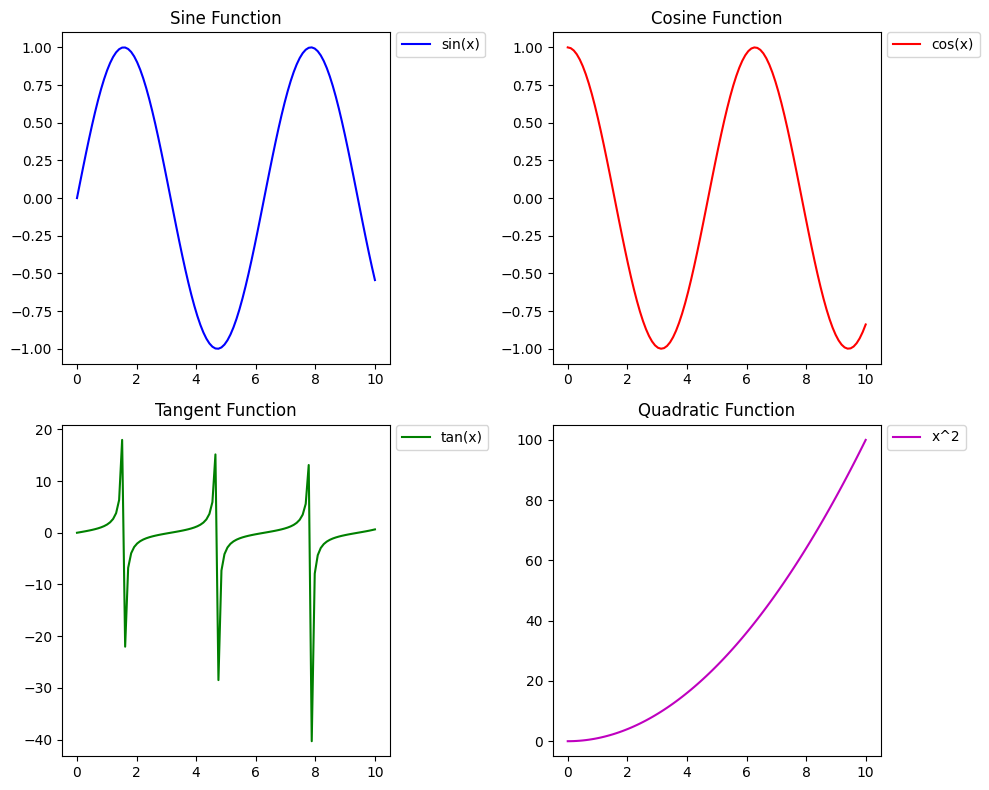

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = x ** 2

# Create a figure
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

# Plot data on the first subplot
axs[0, 0].plot(x, y1, label='sin(x)', color='b')
axs[0, 0].set_title('Sine Function')
axs[0, 0].legend()

# Plot data on the second subplot
axs[0, 1].plot(x, y2, label='cos(x)', color='r')
axs[0, 1].set_title('Cosine Function')
axs[0, 1].legend()

# Plot data on the third subplot
axs[1, 0].plot(x, y3, label='tan(x)', color='g')
axs[1, 0].set_title('Tangent Function')
axs[1, 0].legend()

# Plot data on the fourth subplot
axs[1, 1].plot(x, y4, label='x^2', color='m')
axs[1, 1].set_title('Quadratic Function')
axs[1, 1].legend()
# Place the legend outside the plot area for both subplots
axs[0,0].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)
axs[0,1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)
axs[1,0].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)
axs[1,1].legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)
# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()